In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
startup = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\50_Startups.csv")
startup.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [7]:
startup.drop(columns = ['Administration', 'State'], inplace = True)

In [8]:
startup.isnull().sum()

R&D Spend          0
Marketing Spend    0
Profit             0
dtype: int64

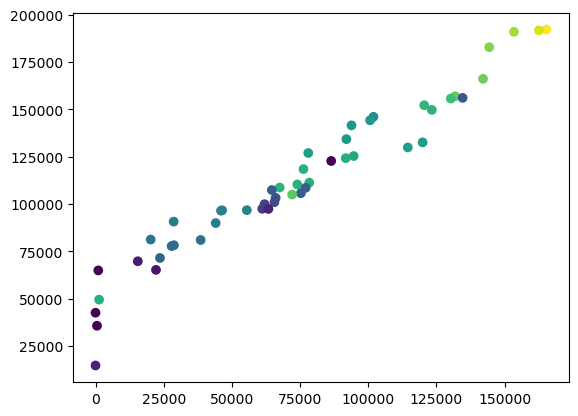

In [9]:
plt.scatter(startup['R&D Spend'], startup['Profit'], c = startup['Marketing Spend'])
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


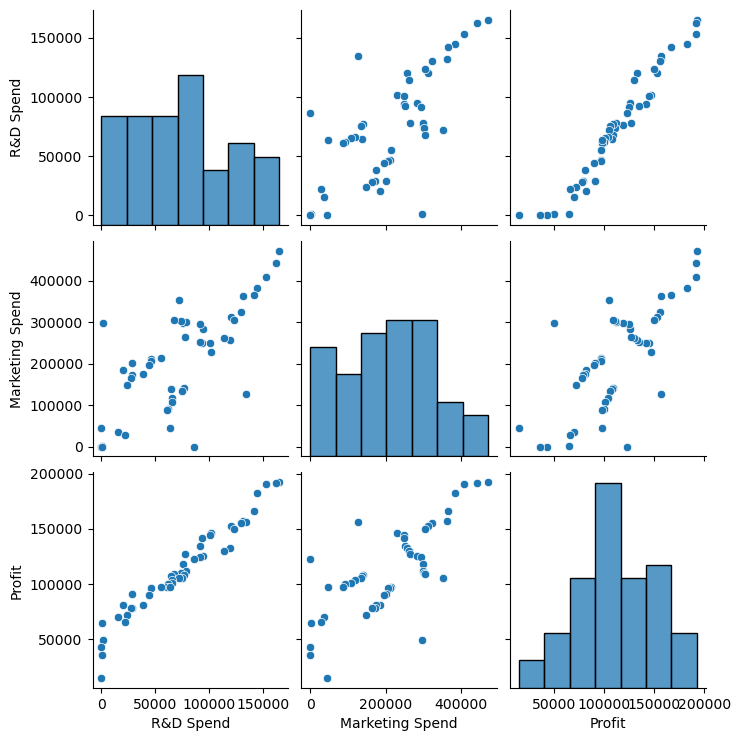

In [10]:
sns.pairplot(startup)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

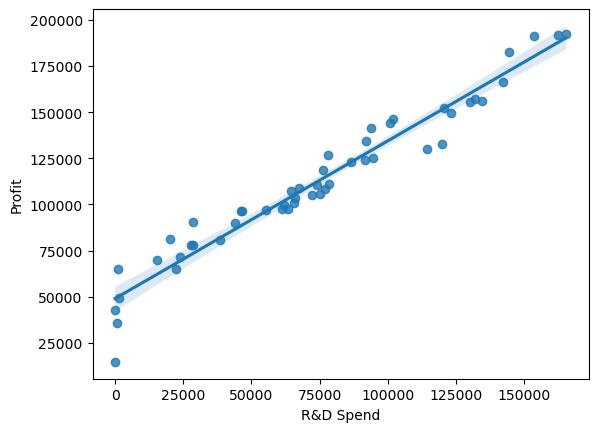

In [11]:
sns.regplot(x = startup['R&D Spend'], y = startup['Profit'], data = startup)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

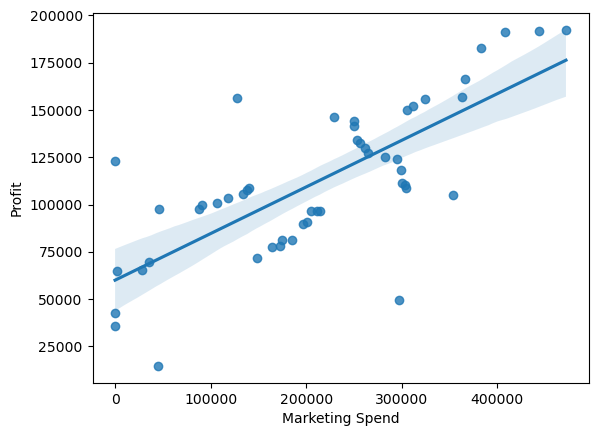

In [12]:
sns.regplot(x = startup['Marketing Spend'], y = startup['Profit'], data = startup)

In [13]:
startup.corr()

,R&D Spend,Marketing Spend,Profit
R&D Spend,1.000000,0.724248,0.972900
Marketing Spend,0.724248,1.000000,0.747766
Profit,0.972900,0.747766,1.000000


In [42]:
x = startup.iloc[:,:-1]
y = startup.iloc[:, 2:3]

In [15]:
# train_test_split
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [17]:
# standardization
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [122]:
reg.intercept_

array([45023.34161982])

In [123]:
reg.coef_

array([[0.78383145, 0.04017949]])

In [94]:
y_pred = reg.predict(x_test)
y_pred

array([[144293.14340044],
       [ 88034.02755184],
       [107902.79663139],
       [ 43660.22487393],
       [148159.91801163],
       [ 43127.36559556],
       [122901.49467851],
       [112464.65592973],
       [107472.31764032],
       [128458.50800126],
       [146037.44105276],
       [198715.0292556 ],
       [ 94408.23575542]])

In [24]:
# cross validation score
from sklearn.model_selection import cross_val_score

In [25]:
cvs = cross_val_score(reg, x_train , y_train, scoring = "neg_mean_squared_error",  cv = 3)
cvs

array([-4.61853745e+07, -8.52348012e+07, -1.56238786e+08])

In [26]:
np.mean(cvs)

-95886320.609168

In [29]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [30]:
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [31]:
mse, mae, rmse

(214688574.6017019, 11990.856048501624, 14652.25493232021)

In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.8002454183096023

In [39]:
n = len(y_test)
p = x_test.shape[1]
adj_r2s = 1- ((1-score)*(n-1)/(n-p-1))
adj_r2s

0.7602945019715227

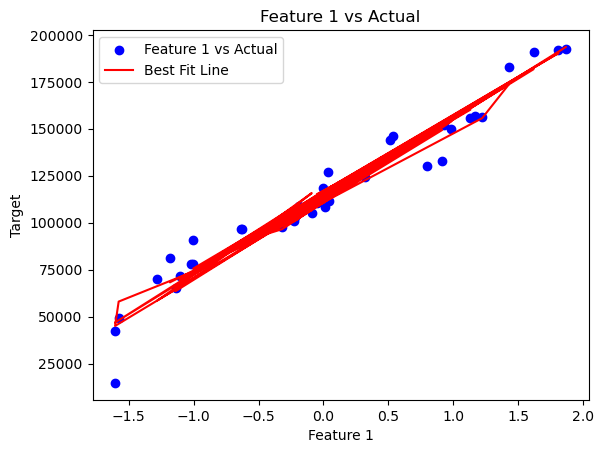

In [53]:

plt.scatter(x_train[:, 0], y_train, color='blue', label='Feature 1 vs Actual')
plt.plot(x_train[:, 0], reg.predict(x_train), color='red', label='Best Fit Line')

plt.title('Feature 1 vs Actual')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()


Assumptions

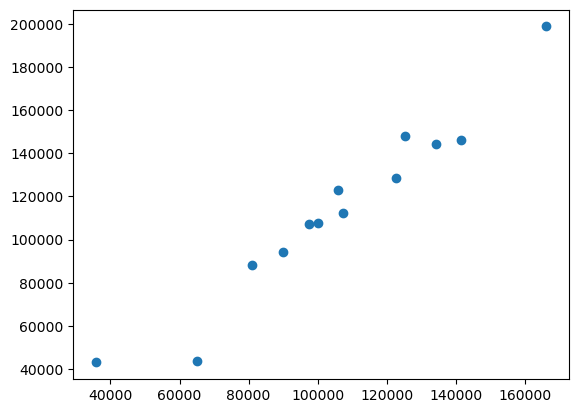

In [80]:
plt.scatter(y_test, y_pred)

In [101]:
resi = y_test-y_pred
resi.head(3)

,Profit
13,-9985.793400
39,-7028.267552
30,-7965.206631


C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


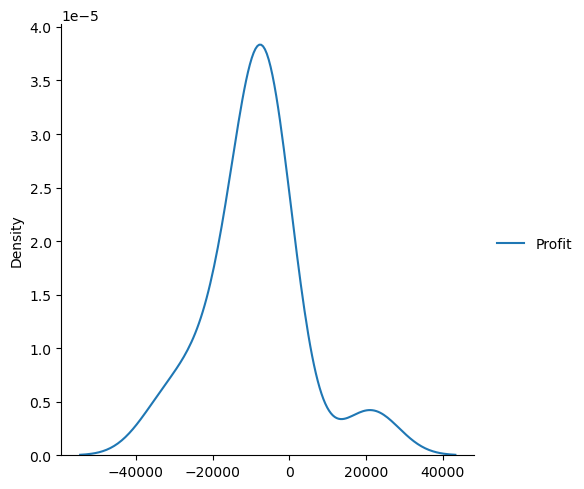

In [99]:
sns.displot(resi, kind = 'kde')

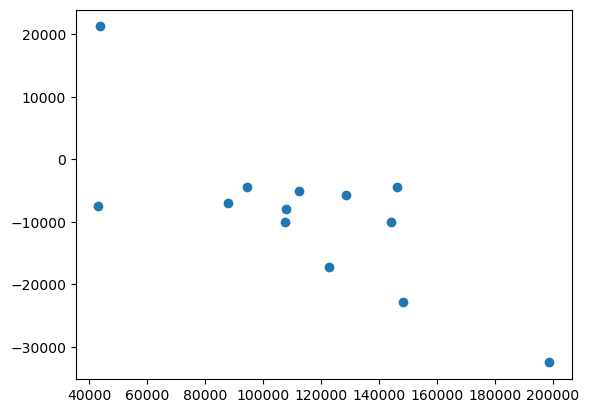

In [102]:
plt.scatter(y_pred , resi)

In [115]:
import statsmodels.api as sm

In [116]:
model = sm.OLS(y_train, x_train).fit()

In [117]:
pred = model.predict(x_test)
pred

13    121951.523026
39     63483.549323
30     68018.169228
45      1175.030107
17    129527.699338
48       452.093289
26     86821.904973
25     78627.859987
32     61134.797608
19     72077.790699
12    123006.568925
4     184066.177630
37     72023.620812
dtype: float64

In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              519.1
Date:                Thu, 10 Oct 2024   Prob (F-statistic):                    9.63e-27
Time:                        22:45:03   Log-Likelihood:                         -422.42
No. Observations:                  37   AIC:                                      848.8
Df Residuals:                      35   BIC:                                      852.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8340      0.115      7.258      0.000       0.601       1.067
Marketing Spend     0.1790      0.040      4.499      0.000       0.098       0.260
==============================================================================
Omnibus:                        3.294   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                1.536
Skew:                           0.061   Prob(JB):                        0.464
Kurtosis:                       2.009   Cond. No.                         8.90
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
reg.coef_

array([[0.78383145, 0.04017949]])